In [1]:
from __future__ import division
import numpy as np
import pylab as plt
import swordfish as sf
from matplotlib import rc
%matplotlib inline

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})

In [2]:
# Energy grid
Eedges = np.logspace(1.0, 4.0, 30)  # 10 GeV - 10 TeV
Ewidths = Eedges[1:]-Eedges[:-1]
E = (Eedges[1:]*Eedges[:-1])**0.5

# J values for on and off regions (Einasto profile)
J_on = 7.4e21  # GeV^2 cm^-5
J_off = 1.2e22  # GeV^2 cm^-5
Omega_on = 1.2e-3  # sr
Omega_off = 5.6e-3  # sr

In [3]:
# Toy bb spectrum
Edmtab = np.array([  1.00000000e-02,   1.14975700e-02,   1.32194115e-02, 1.51991108e-02,   1.74752840e-02,   2.00923300e-02, 2.31012970e-02,   2.65608778e-02,   3.05385551e-02, 3.51119173e-02,   4.03701726e-02,   4.64158883e-02, 5.33669923e-02,   6.13590727e-02, 7.05480231e-02, 8.11130831e-02,   9.32603347e-02, 1.07226722e-01, 1.23284674e-01, 1.41747416e-01, 1.62975083e-01, 1.87381742e-01, 2.15443469e-01, 2.47707636e-01, 2.84803587e-01, 3.27454916e-01, 3.76493581e-01, 4.32876128e-01, 4.97702356e-01, 5.72236766e-01, 6.57933225e-01, 7.56463328e-01, 8.69749003e-01, 1.00000000e+00, 1.14975700e+00, 1.32194115e+00, 1.51991108e+00, 1.74752840e+00, 2.00923300e+00, 2.31012970e+00, 2.65608778e+00, 3.05385551e+00, 3.51119173e+00, 4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00, 7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01, 1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01, 2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01, 3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01, 6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02, 1.14975700e+02, 1.32194115e+02, 1.51991108e+02, 1.74752840e+02, 2.00923300e+02, 2.31012970e+02, 2.65608778e+02, 3.05385551e+02, 3.51119173e+02, 4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02, 7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03, 1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03, 2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03, 3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03, 6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04]) 
dNdEdmtab = np.array([  3.34738986e+01,   3.70135483e+01,   4.05479275e+01, 4.40681117e+01,   4.75165982e+01,   5.09304318e+01, 5.43208488e+01,   5.73412882e+01,   6.00604814e+01, 6.23838867e+01,   6.43767038e+01,   6.59439433e+01, 6.69298173e+01,   6.73611797e+01,   6.72531408e+01, 6.66952763e+01,   6.55855934e+01,   6.39142571e+01, 6.17984779e+01,   5.93003165e+01,   5.64909370e+01, 5.33844951e+01,   5.00377845e+01,   4.65746484e+01, 4.30472931e+01,   3.95021877e+01,   3.59899246e+01, 3.25643084e+01,   2.92873222e+01,   2.61787625e+01, 2.32731094e+01,   2.05763350e+01,   1.81020171e+01, 1.58584584e+01,   1.38317163e+01,   1.20221484e+01, 1.04116379e+01,   8.98485965e+00,   7.72904168e+00, 6.62886850e+00,   5.67122257e+00,   4.83905018e+00, 4.11851810e+00,   3.49651388e+00,   2.96094904e+00, 2.50101455e+00,   2.10583984e+00,   1.76616108e+00, 1.47348135e+00,   1.22128135e+00,   1.00365912e+00, 8.14815571e-01,   6.54622234e-01,   5.24115220e-01, 4.18528257e-01,   3.32429159e-01,   2.61567911e-01, 2.03715593e-01,   1.57001312e-01,   1.19622828e-01, 9.00031431e-02,   6.66612955e-02,   4.86293045e-02, 3.48974308e-02,   2.45657581e-02,   1.69246366e-02, 1.13391987e-02,   7.45858329e-03,   4.78121711e-03, 2.98044958e-03,   1.80392607e-03,   1.05626867e-03, 6.06840081e-04,   3.37583383e-04,   1.81206399e-04, 9.36364505e-05,   4.75761359e-05,   2.41858520e-05, 1.22199231e-05,   6.38505412e-06,   3.64167289e-06, 2.29933057e-06,   1.51463040e-06,   0.00000000e+00, 0.00000000e+00,   0.00000000e+00,   0.00000000e+00, 0.00000000e+00,   0.00000000e+00,   0.00000000e+00, 0.00000000e+00,   0.00000000e+00,   0.00000000e+00, 0.00000000e+00,   0.00000000e+00,   0.00000000e+00, 0.00000000e+00,   0.00000000e+00,   0.00000000e+00, 0.00000000e+00])
dNdE_dm = lambda E, m: np.exp(np.interp(np.log(E/m*1000), np.log(Edmtab), np.log(dNdEdmtab+1e-100), left = -100, right = -100))*1000/m

In [4]:
# Effective Area
#Et, EffA = np.loadtxt("../data/CTA_effective_A.txt", unpack=True)
Et = np.array([0.01, 0.010999999999999999, 0.012, 0.012, 0.014, 0.014999999999999999, 0.016, 0.017999999999999999, 0.02, 0.021999999999999999, 0.024, 0.027, 0.032000000000000001, 0.037999999999999999, 0.047, 0.059999999999999998, 0.076999999999999999, 0.108, 0.14399999999999999, 0.20499999999999999, 0.28699999999999998, 0.40899999999999997, 0.55800000000000005, 0.80600000000000005, 1.147, 1.6120000000000001, 2.3620000000000001, 3.367, 4.915, 7.0789999999999997, 10.786, 16.324999999999999, 23.957000000000001, 35.972999999999999, 54.746000000000002, 83.716999999999999, 124.03400000000001, 175.73099999999999, 259.08499999999998, 299.24900000000002])
EffA = np.array([1.4490000000000001, 6.1550000000000002, 11.467000000000001, 25.184000000000001, 59.579000000000001, 116.911, 253.63999999999999, 477.34100000000001, 941.83100000000002, 1625.7629999999999, 2755.1439999999998, 5114.8609999999999, 9531.0159999999996, 17886.315999999999, 33264.425999999999, 62050.675999999999, 97498.25, 147900.0, 198700.0, 259100.0, 322000.0, 403500.0, 518700.0, 727000.0, 998400.0, 1292000.0, 1687000.0, 2030000.0, 2597000.0, 3175000.0, 3810000.0, 4034000.0, 4034000.0, 4070000.0, 4063000.0, 4117000.0, 4150000.0, 4111000.0, 4056000.0, 4093000.0])
Aeff = lambda E: np.interp(E, Et*1e3, EffA*1e4)  # Effective area in cm^2, as function on energy in GeV

In [5]:
# Background intensity
dNdE_e = lambda E: 1.17e-11*np.where(E > 1e3, (E/1e3)**-3.9, (E/1e3)**-3.0)
dNdE_p = lambda E: 1e-2*8.73e-9*(E/1e3)**-2.71 *3**-1.71  # From dE--dE'
dNdE_bkg = lambda E: dNdE_e(E) + dNdE_p(E)

In [6]:
# Instantiate Swordfish
Tobs = 3600*500  # 50 h observation time
B = np.concatenate((dNdE_bkg(E)*Ewidths*Omega_on, dNdE_bkg(E)*Ewidths*Omega_off))
# K = np.diag((B.flatten()*0.01)**2)  # 1% uncorrelated BG uncertainty per bin
K = None
Exposure = np.concatenate((Aeff(E)*Tobs * np.ones_like(E), Aeff(E)*Tobs * np.ones_like(E)))
print(B.shape, Exposure.shape)
SF = sf.Swordfish([B], T = [0.5], E = Exposure.flatten())

(58,) (58,)


In [7]:
# Derive upper limits

Sfunc = lambda m: np.concatenate((dNdE_dm(E, m)*Ewidths*J_on/8/np.pi/m**2, dNdE_dm(E, m)*Ewidths*J_off/8/np.pi/m**2))

mDMlist = np.logspace(2., 4., 30)
ULlist = []
DRlist = []
for mDM in mDMlist:
    S = Sfunc(mDM)
#     print(S.shape)
    UL = SF.upperlimit(S.flatten(), 0.05)
    DR = SF.discoveryreach(S, 2.87e-7)
    ULlist.append(UL)
    DRlist.append(DR)

In [8]:
# Define tensor and vector fields (works properly only on linear scales)
Sfunc2 = lambda m10, sv10: Sfunc(10**m10)*10**sv10
sv10list = np.linspace(-27., -25., 50)
m10list  = np.linspace(2, 4, 50)
TF = SF.getfield(Sfunc2, m10list, sv10list)
vf1, vf2 = TF.VectorFields()

([<matplotlib.axis.XTick at 0x1718a7730>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


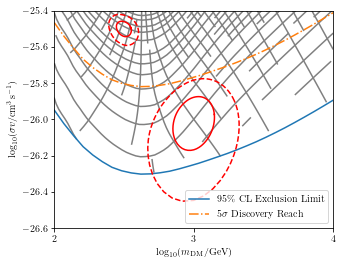

In [9]:
plt.figure(figsize=(5,4))
mask = lambda x, y: (y > np.interp(x, np.log10(mDMlist), np.log10(ULlist))) & (y<-25)
vf1.streamlines(color='0.5', mask = mask, Nmax = 200);
vf2.streamlines(color='0.5', mask = mask, Nmax = 200);
plt.plot(np.log10(mDMlist), np.log10(ULlist), label=r"$95\%$ CL Exclusion Limit")
plt.plot(np.log10(mDMlist), np.log10(DRlist), ls = "-.", label=r"$5\sigma$ Discovery Reach")
TF.contour([3, -26], 1, color='r', ls='-');
TF.contour([3, -26], 2, color='r', ls='--');
TF.contour([2.5, -25.5], 1, color='r', ls='-');
TF.contour([2.5, -25.5], 2, color='r', ls='--');
TF.contour([3.5, -25.3], 1, color='r', ls='-');
TF.contour([3.5, -25.3], 2, color='r', ls='--');
plt.xlim([2, 4])
plt.ylim([-26.6, -25.4])
# y = [-27.0,-26.5,-26.0,-25.5]
x = [2,3,4]
plt.ylabel(r"$\log_{10}(\sigma v / \rm cm^3 s^{-1})$")
plt.xlabel(r"$\log_{10}(m_{\mathrm{DM}}/\rm GeV)$")
plt.legend(loc=4)
# plt.yticks(y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.tight_layout(pad=0.3)
# plt.savefig("CTA.eps")